In [21]:
%pylab inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import random
import seaborn
# settings for the display options!
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', 50)
pd.set_option('display.width', 50)
pd.options.display.max_columns = 1000
#tosave=dfsam[400:450]
#tosave.to_csv("d://show.csv", sep=';',index=False)


Populating the interactive namespace from numpy and matplotlib


C:\Users\adalbaw\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Laden der Daten!

In [22]:
df= pd.read_excel('c:\\Out.xlsx', delimiter=";")
print(df.shape[0],"rows", df.shape[1]," columns")
df.head()
df.describe(include='all')# top 0 most frequent value 
df['employeeType'].value_counts()# values with freq in a column
#print(df.employeeType.unique(), len(df.employeeType.unique()))    #get the values in a column with values and thier lens

25029 rows 24  columns


EBO                  16601
QO                    3568
U3                     797
I                      652
T3                     569
B3                     327
Ejmozjig Ohsgupoo      313
E                      252
QN                     230
M                      210
Fujmzifmuz             112
B1                     105
Q                       89
S                       83
T8                      42
H                       31
B8                      30
U8                      29
C3                      28
C8                      16
ET                       6
QI                       2
OQO                      1
EI                       1
Name: employeeType, dtype: int64

In [64]:
df['employeeType'].value_counts()
df[df.employeeType == 'EBO' ]     #get rows according to a condition

#df[(df.employeeType == 'EBO') & (df.mail.notnull())].count() #get rows according conditions

#df[(df.employeeType == 'EBO')].count()
nullMail=df[(df.employeeType == 'EBO') & (df.mail.isnull())].count().sort_values(ascending=False)
#dff= pd.DataFrame()
#dff["freq"]= df['employeeType'].value_counts().sort_values(ascending=False)
#dff
type(list(nullMail) )
names=list(nullMail.index)
newnames=[]

for i in names:
    
    if len(i) > 10:
        name = i[0]
        for letter in i:
            if letter.isupper():
                name+= letter
            elif letter.isdigit():
                name+= letter
        newnames.append(name)
    else:
        newnames.append(i)
        
print(names)                
newnames       

['country', 'City', 'distinguishedName', 'sn', 'givenName', 'Enabled', 'DisplayName', 'company', 'physicaldeliveryOfficename', 'name', 'employeeType', 'postalcode', 'department', 'displayNamePrintable', 'extensionAttribute14', 'personalTitle', 'Title', 'Division', 'manager', 'extensionAttribute2', 'extensionAttribute4', 'extensionAttribute6', 'extensionAttribute1', 'mail']


['country',
 'City',
 'dN',
 'sn',
 'givenName',
 'Enabled',
 'DDN',
 'company',
 'pO',
 'name',
 'eT',
 'postalcode',
 'department',
 'dNP',
 'eA14',
 'pT',
 'Title',
 'Division',
 'manager',
 'eA2',
 'eA4',
 'eA6',
 'eA1',
 'mail']

Text(1,0,'percent')

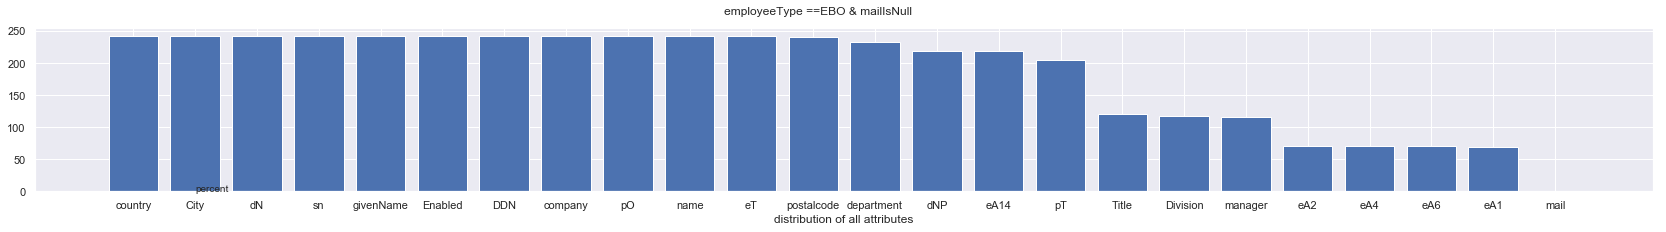

In [77]:



names = list(newnames)
values = list(nullMail)


fig, axs = plt.subplots(1, 1, figsize=(29,3), sharey=True)
axs.bar(names, values)
#axs[1].scatter(names, values)
#axs[2].plot(names, values)
fig.suptitle('employeeType ==EBO & mailIsNull')
plt.xlabel('distribution of all attributes')

axs.annotate("percent", xy=(1, 0), xycoords=('data', 'axes fraction'))

Text(0.5,0.98,'Categorical Plotting')

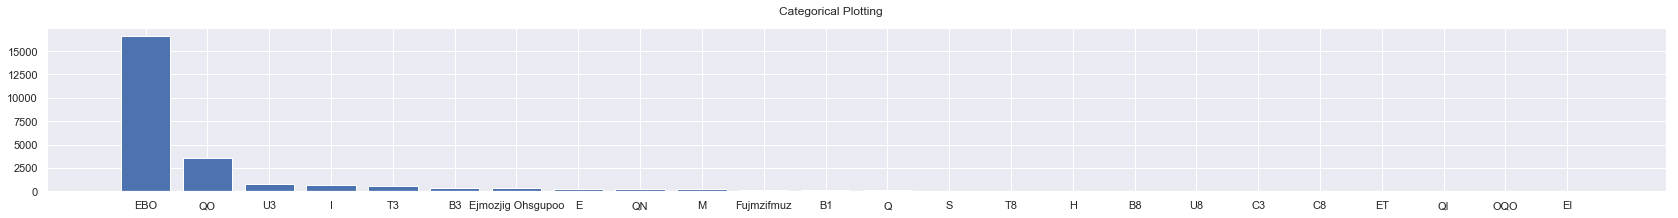

In [71]:
distOfEmpType= df['employeeType'].value_counts()# values with freq in a column
list()

names = list(distOfEmpType.index)
values = list(distOfEmpType)

fig, axs = plt.subplots(1, 1, figsize=(29,3), sharey=True)
axs.bar(names, values)
#axs[1].scatter(names, values)
#axs[2].plot(names, values)
fig.suptitle('Distribution of empType')


[ 0.67414372  0.2691442   1.46369176 -0.31417207  1.3908758   0.43864769
 -1.09281437  0.10931536 -1.71928705  1.7824867   0.75351104 -0.77100761
 -1.14271329  0.5314581  -0.19955609 -2.45441649  1.48252834  0.14971847
 -0.3636465  -0.66931241 -0.95132324 -1.47315186 -0.91312136 -0.61868519
 -0.82321191  0.87808816 -1.32588205 -0.81038305 -0.7558139   1.15479769
  0.7116533   0.79309011  1.05962564  0.39237423 -0.17995031 -0.35483529
  0.24771758  0.85047469 -0.41200843  0.36449619 -0.31949238 -0.73085695
 -0.75714262 -0.04659471  0.43236548  1.54714338 -0.06394099  1.18929064
  0.96990829  0.03844801  1.94640182 -0.35725726  0.00692544  0.81567682
 -0.83127258  0.53944198  0.88964881  0.40416121 -1.82766485  1.27846518
  2.65753043  0.41362059 -0.40898923 -1.1749187  -0.2930762   1.48542194
 -0.09267445  0.92090859  0.30414657  1.31361833 -1.30739411 -1.5689487
  0.70549645  0.83033754 -0.46174018 -0.5018525   0.37390949  0.94696457
  0.78994491  0.23884726 -0.79760111  0.74223321] va

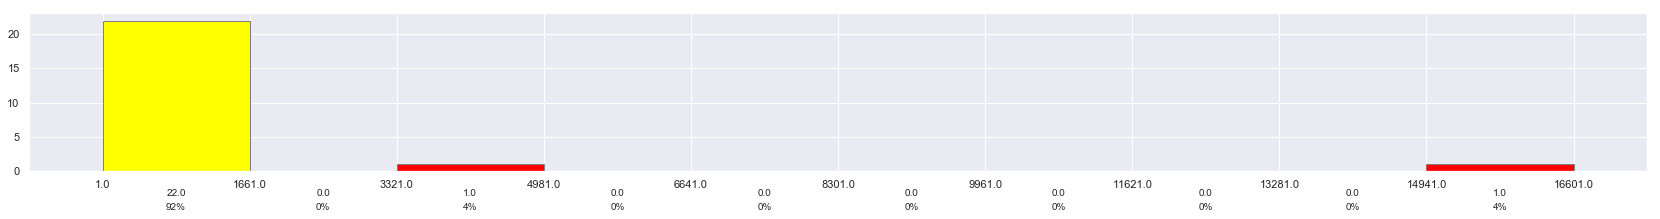

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

data = distOfEmpType
print(values,"values")
print(distOfEmpType,"distof")

#data = [1,2,3,4,100,6,7,8,9,10]
fig, ax = plt.subplots(figsize=(29,3))
counts, bins, patches = ax.hist(data, facecolor='yellow', edgecolor='gray')
#bins= names
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(data, [25, 75])
for patch, rightside, leftside in zip(patches, bins[1:], bins[:-1]):
    if rightside < twentyfifth:
        patch.set_facecolor('green')
    elif leftside > seventyfifth:
        patch.set_facecolor('red')

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')

print(data)
# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.show()


['EBO',
 'QO',
 'U3',
 'I',
 'T3',
 'B3',
 'Ejmozjig Ohsgupoo',
 'E',
 'QN',
 'M',
 'Fujmzifmuz',
 'B1',
 'Q',
 'S',
 'T8',
 'H',
 'B8',
 'U8',
 'C3',
 'C8',
 'ET',
 'QI',
 'OQO',
 'EI']

<function seaborn.categorical.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

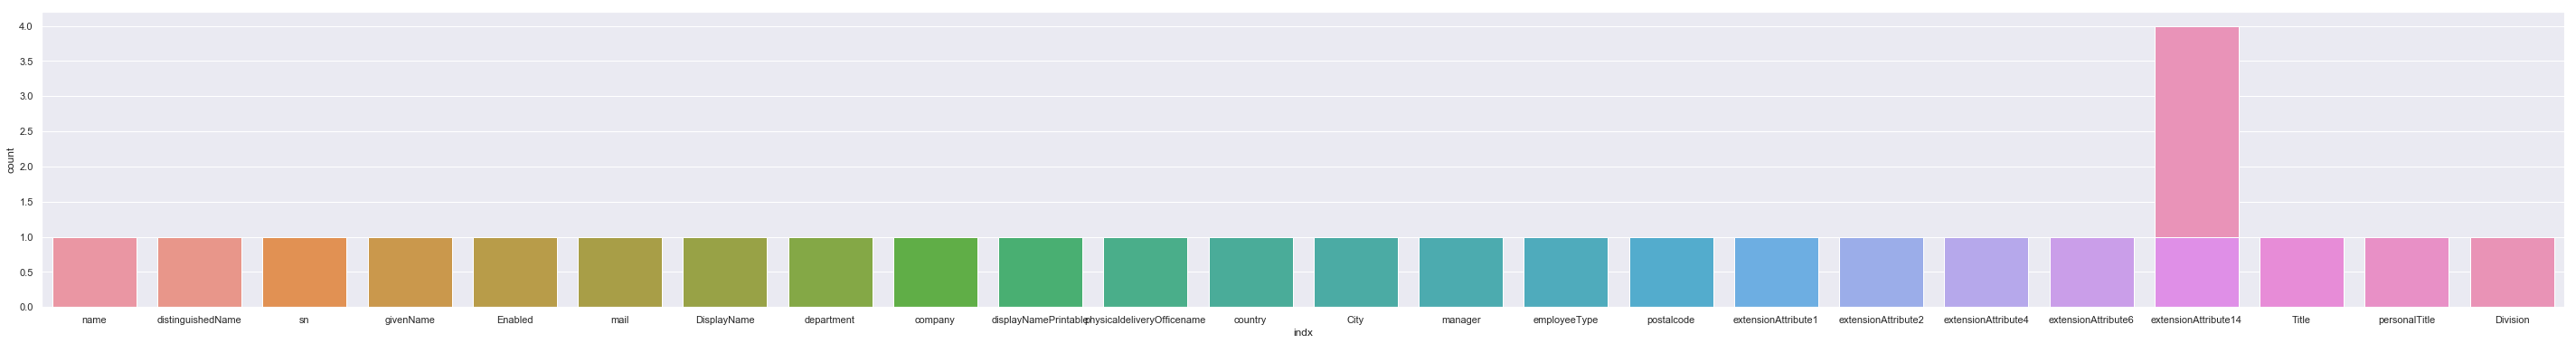

In [4]:
width=50
height=6
figure(figsize=(width,height))
ax = sns.countplot(x=dff.indx, data=dff.freq)
ax = sns.countplot(x="indx", data=dff)
sns.countplot

In [109]:
x=df[(df.mail.isnull())].count()

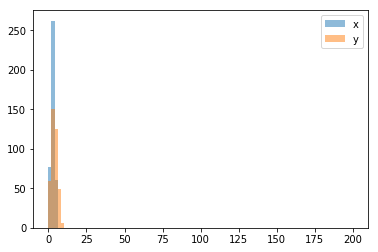

In [70]:
x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = np.linspace(0, 200, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:

#apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets=frequent_itemsets[ (frequent_itemsets['length'] >= 2) &
                   (frequent_itemsets['support'] >= 0.8) ]
pd.options.display.max_rows = 999
ass=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7,support_only=True)
#ass["antecedents"] =={'name'}

In [4]:
#working example with categorical data



te = TransactionEncoder()
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]



te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(df, min_support=0.6,use_colnames=True)
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
1,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
2,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.600000
3,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.600000
5,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf


In [10]:
import re
df= pd.read_excel('c:\\Out.xlsx', delimiter=";")
df

for i in df["distinguishedName"]:
    print(i)


CN=ic556_w555zhil_58s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w551yctl_58s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w551yctl_53s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w5551zss_53s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w555z68k_51s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w5551zss_51s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w555zhil_51s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w551212s_51s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_ichejiff_66s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w551yd3i_53s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=ic556_w5514p9s_51s_i,OU=AbozbSzumofmoc,OU=_NguvigIchejebmzimeuj,DC=

CN=REZRO55G,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BEONT55F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=SGIMW55F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Zibha54R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Jeogb19H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=JEOGB55N,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Buozo55R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HUOGG54R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Gusob53T,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=AGGIN55B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Hizme53T,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=TZIJC55R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=IRBOJ55I,OU=CR,OU=Abozb,O

CN=GIZBO58V,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Dijbo55I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yujbb59V,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Rzebm59T,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Buozo50S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=MZIEB55G,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=MAZFE55J,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HODMI55S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=DIJBO57S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=IIZDA55M,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=MDZAO55F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=TZUJF55E,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=VOJJO53H,OU=CR,OU=Abozb,O

CN=Yuozn53N,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=CIHH555B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Buozo53F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Ijcozbuj Joeg joeg.ijcozbuj,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Cazijm Hizmpj w551v0oh,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dizmgop Yubosd yubosd.dizmgop,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fdiig Dihwi dihwi.fdiig,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Nuczecno Siag siag.nuczecno,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Sezwici Bpoc bpoc.sezwici,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dolemm Ijczol w551f3jt,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fdzeb32I,OU=CR,OU=Abozb,OU

CN=RYIOZ55F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Rjacb53O,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Uobmo54M,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HUAZE55Y,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Dijbo98H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=YABMO55C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Ijcoz82R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BDOKO55G,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=MOREJ55B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yojbo59I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=JEBBO55I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Leggeihb Nizp leggeihbnizp,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=V

CN=Jeogb19R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=GIZBO55F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Zuvozmb Vzpj zuvozmb.vzpj,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Hibuj Behuj hibuj.behuj,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=U'Cujjogg Siag siag.ucujjogg,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Zooc Igij w5516dwv,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=HfJiandmuj Yihob w551iswp,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Duzbgop Yudj w5516dwy,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Blijj Fdizgojo w551oz3l,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fuusoz Ihp w551iwiy,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Yojbo75Y,OU=CR,OU=Abo

CN=Yojbo39B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Dojje51H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=DKIBB55D,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Hicbo53N,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Rzind53R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=GOMAR55B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=JEOGB57S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=SIAGB55D,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=GEJNO55M,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Gizbo37B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=RZPWI55O,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Ijcoz88F,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=GAJCM55O,OU=CR,OU=Abozb,O

CN=Jeogb54O,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yojbo34H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Socoz56Z,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Gizbo32R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Rjacb51B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BRUAB55R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Socoz84B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BIGOJ55C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Suagb53H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Jeogb55S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=CIHNI55C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Jeogb59G,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Dijbo36V,OU=CR,OU=Abozb,O

CN=Jinog Yibuj jinog55y,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Mduzbvp Cojjeb mduzb55c,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Yifrbuj Bmosdoj yifrb50b,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Neghij Iizuj neghi55i,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rozz Hefdiog rozz555h,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dobgoz Nzonuzp dobgo55n,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tzemw Meji tzemw53m,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fizop Igoqijcoz fizop55i,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Cejlecceo Lojcp cejle55l,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fizhefdiog Roemd fizhe55r,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=

CN=Rejroico Gujjeo w5582fwz,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Zidj Yubdai w551otlz,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dojrojbeotroj Ijczo dojro55i,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Yijbboj Goji Rimdizeji yijbb57g,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Yazibfdri Bkoj yazib55b,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Didj Himmdeib didj551h,OU=Abozb,OU=_Fojmzig,OU=5GOB553,OU=5GOB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Daovjoz Hefdiogi daovj59h,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dajmo Iqog dajmo55i,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dizojvazn Hogijeo dojro53h,OU=Fuhsgeijfo553,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dozzozi-Bijfdow Fezu dozzo55f,OU=Abozb,OU=_F

CN=YAAGB55D,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=UKOZN55H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=MDUJC55Z,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Socoz82R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yiruv58R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Vzaaj55R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=TEJCO55I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Fdzeb50I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yojbo98S,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BUODU55O,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=YOJBO14B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HUANI55B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BKOJJ55M,OU=CR,OU=Abozb,O

CN=Fdzeb56T,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=VIIJC55Y,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Odgoz58D,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Dijbo51C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HUOBR55H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Ivzid53Y,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Cihni55B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Fgohh55O,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=FUZZO55T,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yudjb53R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yabmo55R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Gizbo56R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Jeogb38Z,OU=CR,OU=Abozb,O

CN=HUABM55C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Guzoj53Z,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=DIJBO36Y,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Zefdm53I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Mutm553B,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=ZUGBN55H,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HUOBN53R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HICBO55A,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yojbo02R,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=ZIYIB55C,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=UOZAH53Y,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=KUOMH55I,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Somoz37M,OU=CR,OU=Abozb,O

CN=Sizbujb Eij w551jphy,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vzicbdil Nizp w551spap,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Recnoz Yujimdij w551ja6i,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Brejjoz Siag w551zf8q,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Zibuge-Hodcewici Butei w5584q2p,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bdijj Covuzid w551zcbz,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bhemd Garo w551spkk,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tuum Siag w551splt,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bliggul Cikec w551sppi,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bmosdojbuj Bizid w5512k5y,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=

CN=Hozfoz Yiheo w551hrjs,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bprob Cikec w551hayw,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fugo Cizzoj w551h2bz,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vgihezob Sdeges w551ha1k,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fgipmuj Cikec w5512rvi,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Begvp Sdegges w551j3ls,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tivzej Iggij w558cb3p,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Ighop Hefdiog w551s5ic,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dughob Fdzebmusdoz w551jiyv,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Sizrejbuj Garo w551j11t,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=le

CN=Susobfa Zigafi susob55z,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Radghoeoz Bijczi radgh53b,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Mafroz Rokej mafro53r,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rojzefr Ciggib rojze55c,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Mduhsbuj Yottzop mduhs38y,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bgifr Rojjomd bgifr55r,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dijcpbeco Mduhib dijcp55m,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Dizhopoz Zubigejci dizho55z,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Nzettej Nizp nzett55n,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Ne

CN=W551Y0CC-I53,OU=SzekegonocIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Huzij Ijczol w551mymd,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Yobmoz Yojjeo w551o5vk,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Hegob Hejcp bfo53177,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=Abozb,OU=_Fojmzig,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Uoebmic Ejnajj Bgomkugc w551cidi,OU=Abozb,OU=_Fojmzig,OU=5GJU553,OU=5GJU,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tgimiroz Iazuzi Hizeo Tubge w551dysq,OU=Abozb,OU=_Fojmzig,OU=5GJU553,OU=5GJU,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Oclizcb Zubfuo w551bz7k,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fujjuz Guaebo w551bz7z,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=UWOJ555U,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=KUOK555K,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=

CN=Hugemuz Cikec w551my9s,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fizzibfu Iczeij w551dydi,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=bkfZGI_GCIS,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IA,OU=ZI833,DC=ic556,DC=lejcic,DC=uzn
CN=W553AVAK-I53,OU=SzekegonocIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=RUZBINOZ TZOCOZER ruzbi53t,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Bojpbdpj Mizib bojpb53m,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Nzwojei Ijomi nzwoj53i,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Hegijukef Kgicehez hegij53k,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Rleofeoj Bwfwosij rleof53b,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=BOGKINIJISIMDP MDAGIBE ZIHIJ bogki53m,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn

CN=zi835_w551k0yf_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yc_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yt_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yd_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yy_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0ys_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yz_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0yb_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi835_w551k0ya_53u_i,OU=AbozbTajfmeujig,OU=ZI835,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic

CN=Goo Somoz w551kd5v,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=W551IJTC-I58,OU=SzekegonocIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Wdua Pijn l66iayf5,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IffIch,OU=ZI850,DC=ic556,DC=lejcic,DC=uzn
CN=ZI853_IssHnzIc_553_T,OU=TajfmeujigIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=W5513A1Y-I53,OU=SzekegonocIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=ZI853_lguiZszm_553_B,OU=BozkefoIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=RBH HAMDABAJCDIZ w551kddq,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=ZI853_FHF_553_B,OU=BozkefoIffuajmb,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=CF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Tuum Hefdiog w551ko5a,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vzefrgovijr Fdzebmusdoz w551ab7

CN=Ichej Gefojbo Hijinohojm W551289A-I53,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=EJ,OU=ZI835,DC=ic556,DC=lejcic,DC=uzn
CN=Hoggicu Zuvozmu Yehojow hoggi53z,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Tzofdeggi Izriemw tzofd53i,OU=JujCotejoc,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=GUSOW CO HAZEGGIB DOZZOZUB KEFMUZ HIJAOG gusow53k,OU=JujCotejoc,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Tozjijcow Figku Begkei tozji53b,OU=JujCotejoc,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Zuhij Hizeu zuhij53h,OU=JujCotejoc,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Ifubmi VUVVP l66ikx15,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IffIch,OU=ZI850,DC=ic556,DC=lejcic,DC=uzn
CN=Zimjilim Rzebdji Rijm l66ikbf5,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IffIch,OU=ZI850,DC=ic556,DC=lejcic,DC=uzn
CN=Rahiz Azojczi l66ikmn5,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IffIch,OU=ZI850,DC=ic556,DC=lejcic,DC=uzn
CN=l66bncy5,OU=Aboz

CN=Tegcovzijcm Yuozj w551mi4z,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bfdzuocoz Yubotej w551ld3z,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Nuoroj Hizkej w551ltdr,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Oki Bihaog w551ltak,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bfdhecro Boznoy w551ld3s,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Gilzojw Reh w551ltap,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fizs Cijeog Eujog w551ld3c,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=zi850_w558bp5m_53u_i,OU=AbozbTajfmeujig,OU=ZI850,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=zi850_w551j49k_53u_i,OU=AbozbTajfmeujig,OU=ZI850,OU=MGUAb,OU=_NguvigIchejebmzimeuj,DC=ic556,DC=lejcic,DC=uzn
CN=Sesejb Yifuv w551sh0z,OU=Fuhsgeijfo558,OU=Fuhsgeijfo,OU=A

CN=Digg Mehumdp w551bpdh,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Heggoz Bomd w551qoky,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tizzejnmuj Yifuv w558dozp,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Lingoz Nizp w558tmsh,OU=Abozb,OU=_Fojmzig,OU=5GAB553,OU=5GAB,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Cdijkijmze Babdegojczi w551qdhj,OU=Abozb,OU=_Fojmzig,OU=5GFJ555,OU=5GFJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rihsb Hizeo-Fdzebmej w555hztb,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Mutm Ijczoib Vifdhijj w551f34a,OU=Abozb,OU=_Fojmzig,OU=5GML555,OU=5GML,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=OZERBOJ BIZID HOZOMO DUBMZAS ozerb53b,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Huzcduzbm Ebivog w551qtpm,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Fdijczi Hijebd l66ips15,OU=AbozbTajfmeujig,OU=_Fojmzig

CN=Woogijc Somoz Kij woogi53s,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Zihurnusi Mbdece w551pirt,OU=Abozb,OU=_Fojmzig,OU=5GWI555,OU=5GWI,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Toebm Muvp w551p49w,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=ROZBIGA IJJIVOG rozbi53i,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=HINJABBUJ TZECZER YUJ hinja53t,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Jeogboj Mduhib Zuij Hizfdoz jeogb36m,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Icihb Zuvozm w551p7tm,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Ihuzob Uzmew Ijnog w551p7rr,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Ijcozbuj Yiheo w551p7rs,OU=Abozb,OU=_Fojmzig,OU=5GNV553,OU=5GNV,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Uubmkunogb Gojjozm w551q66o,OU=Abozb,OU=_Fojmzig,OU=5GVO553,OU=5GVO,OU=ZI854,DC

CN=W551W75A,OU=Abozb,OU=_Fojmzig,OU=HI,OU=ZI835,DC=ic556,DC=lejcic,DC=uzn
CN=W551W75W,OU=Abozb,OU=_Fojmzig,OU=HI,OU=ZI835,DC=ic556,DC=lejcic,DC=uzn
CN=Bmamo Tezhi w551w26a,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rzebdjij Szoh Rahiz w551w71c,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Niemujco Bihiz w551w71t,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Z N Sikij Rahiz w551w71d,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=J Hijeziy w551w71y,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vudhijj Gpcei w551w4sd,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vizmog Rokej w551w4si,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Regef Peghiw w551w4jl,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rizzibfd Ijczoi w551w4jw,OU=Abozb,OU=_Fo

CN=Meohijj Hizeoggo w551wm4w,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Vogi Voreh w551qjjq,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=R H Yinicoobd w551wmyw,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Rahiz R Hijhimd w551wmri,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=N B Rihigiriz w551wmrv,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=NAZSAZ IZAJ SIE w551wmrf,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=S Kojrimobd w551wmrc,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Simeg Izkejc Vibikiziy w551wmro,OU=Abozb,OU=_Fojmzig,OU=5GEJ555,OU=5GEJ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Bdizhi Bizeri w551wsqa-w53,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Tuafiagm Ijmuejo tuafi53i,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=i

CN=Pezmhif Vazfa w5595y3b,OU=Abozb,OU=_Fojmzig,OU=5GMZ553,OU=5GMZ,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Hezijci Fizgub hezij53f,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Mdozregcboj Rizbmoj mdozr53r,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Fdemmihaza Nukizcdiji fdemm53n,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Kejmoz Gek Dizmogeab kejmo53g,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Yifuvboj Zerro yifuv58z,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Bfdugw Jerugib w55110oc,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Haoggoz Tzocozef w551k0zl,OU=Abozb,OU=_Fojmzig,OU=5GCO553,OU=5GCO,OU=ZI854,DC=ic556,DC=lejcic,DC=uzn
CN=Socozboj Somoz socoz59s,OU=CR,OU=Abozb,OU=_Fojmzig,OU=OAF,OU=ZI853,DC=ic556,DC=lejcic,DC=uzn
CN=Suzahuk Cegpij l66ic3i5,OU=AbozbTajfmeujig,OU=_Fojmzig,OU=IffIch,OU=ZI850,DC=ic556,DC=lejcic,DC=

In [20]:
df.fillna(0)
newpf=df.notnull().astype('int')
last= newpf[:1000]
#ast.to_csv(index=False)
last.to_csv('d:\\bk1.csv', sep=',', index=False)
last


# In[159]:


df= pd.read_csv('c:\\bk1.csv', delimiter=",")

#df[df==0]=True
#df= pd.DataFrame(df)
#booldf=df.astype(bool)
#booldf
pd.options.display.max_columns = 999
df= pd.read_excel('c:\\Out.xlsx', delimiter=";")
#df[["mail","department","company"]]
df.loc[df.mail.isnull(), ["DisplayName","distinguishedName","mail","department","company","employeeType"]]

FileNotFoundError: File b'c:\\bk1.csv' does not exist

In [72]:
x=df[(df.mail.isnull())].count()
hist(x)

NameError: name 'hist' is not defined

In [4]:
#take a sample 1000 and change the make CN as a new column!


dfsam= df[:1000].copy()
dfsam= df.loc[:, ["DisplayName","distinguishedName","employeeType","mail","department","company"]]
#df["CN"]=


for ii,i in enumerate(dfsam["distinguishedName"]):
    #print(i,ii)
    

    try:
        found = re.search(r'CN=([a-zA-Z0-9 /-/_]*)', i).group(1)
        #print(found)
        dfsam.loc[ii,"CN"]=found
    except AttributeError:
        # AAA, ZZZ not found in the original string
        found = 'error' # apply your error handling
        dfsam.loc[ii,"CN"]=found
    


        

dfsam

KeyError: "None of [['DisplayName', 'distinguishedName', 'employeeType', 'mail', 'department', 'company']] are in the [columns]"

In [13]:
df["employeeType"].notnull().count()

25029

In [123]:
df["employeeType"].isnull().count()

25029

In [96]:
df["employeeType"].isnull().sum(axis = 0)

935

In [97]:
df["employeeType"].notnull().sum(axis = 0)

24094

In [99]:
df.shape

(25029, 24)

In [3]:
lisss=dfsam["employeeType"].tolist()
sett=set(lisss)
len(sett)
lisebo=dfsam[dfsam["employeeType"]=="EBO"]
lisebo2=lisebo[lisebo["mail"].isnull()]
len(lisebo2)
len(lisebo)
lisebo2

NameError: name 'dfsam' is not defined

In [30]:
lisss=df["employeeType"].tolist()
sett=set(lisss)
len(sett)
sett


gg['mail']

KeyError: 'mail'

In [19]:
#gg=df.groupby(["employeeType"]).sum(axis=0).sort_values(by=['Enabled'], ascending=False)
#gg
print(df["employeeType"].isnull().count())
df["employeeType"].notnull().count()

25029


25029

In [53]:
#number of unique values in a column
gw=df.employeeType.value_counts()
#number of mail null values when we have each value of the column employee type
df["mail"].groupby(["employeeType"])


KeyError: 'employeeType'

In [63]:
lisebo=df["mail"][df["employeeType"]=="U3"]
lisebo

39       NaN
40       NaN
41       NaN
43       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
54       NaN
55       NaN
58       NaN
59       NaN
60       NaN
61       NaN
62       NaN
64       NaN
66       NaN
67       NaN
69       NaN
70       NaN
71       NaN
72       NaN
78       NaN
79       NaN
80       NaN
81       NaN
82       NaN
83       NaN
84       NaN
85       NaN
86       NaN
87       NaN
88       NaN
89       NaN
90       NaN
91       NaN
92       NaN
93       NaN
95       NaN
96       NaN
97       NaN
98       NaN
99       NaN
100      NaN
101      NaN
106      NaN
114      NaN
121      NaN
122      NaN
123      NaN
124      NaN
125      NaN
126      NaN
127      NaN
128      NaN
129      NaN
130      NaN
131      NaN
132      NaN
133      NaN
134      NaN
135      NaN
136      NaN
137      NaN
138      NaN
139      NaN
140      NaN
141      NaN
142      NaN
143      NaN
144      NaN
145      NaN
146      NaN

In [64]:
df[df["employeeType"]=="U3"]

,name,distinguishedName,sn,givenName,Enabled,mail,DisplayName,department,company,displayNamePrintable,...,employeeType,postalcode,extensionAttribute1,extensionAttribute2,extensionAttribute4,extensionAttribute6,extensionAttribute14,Title,personalTitle,Division
39,zi650_w551d5fb_53u_i,"CN=zi650_w551d5fb_53u_i,OU=AbozbTajfmeujig,OU=...",Bfdisoz,Yojb,True,NaN,zi650_w551d5fb_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,zi654_w551d5fb_53u_i,"CN=zi654_w551d5fb_53u_i,OU=AbozbTajfmeujig,OU=...",Bfdisoz,Yojb,True,NaN,zi654_w551d5fb_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,zi853_w558bjts_53u_i,"CN=zi853_w558bjts_53u_i,OU=AbozbTajfmeujig,OU=...",Gizboj,Hizmej Vizhiz,True,NaN,zi853_w558bjts_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,zi853_w558oqza_53u_i,"CN=zi853_w558oqza_53u_i,OU=AbozbTajfmeujig,OU=...",Yojboj,Hizmej Oggohubo,True,NaN,zi853_w558oqza_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,zi853_w558y3yd_53u_i,"CN=zi853_w558y3yd_53u_i,OU=AbozbTajfmeujig,OU=...",Fdzebmojboj,Dojzer,True,NaN,zi853_w558y3yd_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,zi853_w5534yqk_53u_i,"CN=zi853_w5534yqk_53u_i,OU=AbozbTajfmeujig,OU=...",Yiruvboj,Rizbmoj Juoztogm,True,NaN,zi853_w5534yqk_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,zi853_w558hw3f_53u_i,"CN=zi853_w558hw3f_53u_i,OU=AbozbTajfmeujig,OU=...",Nagcvzijc,Ribsoz,True,NaN,zi853_w558hw3f_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,zi853_w558kica_53u_i,"CN=zi853_w558kica_53u_i,OU=AbozbTajfmeujig,OU=...",Bmuokzejn,Oyjoz,True,NaN,zi853_w558kica_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,zi853_w5512kik_53u_i,"CN=zi853_w5512kik_53u_i,OU=AbozbTajfmeujig,OU=...",Susi,Fimigej-Oanoj,True,NaN,zi853_w5512kik_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,zi853_w558owdy_53u_i,"CN=zi853_w558owdy_53u_i,OU=AbozbTajfmeujig,OU=...",Ruzniizc,Hizmej,True,NaN,zi853_w558owdy_53u_i,NaN,NaN,NaN,...,U3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
